<a href="https://colab.research.google.com/github/tony-kr/Major_Project/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/Python Smartknower/Major Project/owid-covid-data.csv')
dfm = df.drop(labels=['iso_code'],axis=1)
dfm

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,2441.578,1.211,1.672,100.048,0.135,0.183,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1764.0,394798.0,26.563,0.119,1657.0,0.111,0.015,66.7,tests performed,35518.0,35518.0,NaN,3278.0,2009.0,0.24,0.24,NaN,135.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74440,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,2443.731,2.153,1.663,100.182,0.135,0.163,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2056.0,396854.0,26.701,0.138,1635.0,0.110,0.015,66.2,tests performed,35761.0,35761.0,NaN,243.0,1526.0,0.24,0.24,NaN,103.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74441,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,2445.077,1.346,1.557,100.182,0.000,0.106,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2164.0,399018.0,26.847,0.146,1672.0,0.112,0.014,72.2,tests performed,35901.0,35901.0,NaN,140.0,1133.0,0.24,0.24,NaN,76.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74442,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.28

In [ ]:

x = dfm.drop(labels=['new_cases','continent','location','date'],axis=1)
y = dfm['new_cases']

In [ ]:
x.head()
y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: new_cases, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    dfm.drop(labels=['new_cases'],axis=1),
    dfm['new_cases'],
    test_size=0.3,
    random_state=0)

x_train.shape, x_test.shape

((52110, 57), (22334, 57))

In [ ]:
x_train.corr()

,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.889306,0.982440,0.850206,0.881083,0.138643,0.068337,0.082385,0.160468,0.064896,0.096061,-0.005438,0.897627,0.284027,0.858031,0.151198,0.544405,0.192669,0.835908,0.110393,0.837260,0.960068,0.135669,0.065272,0.861398,0.074777,0.031435,-0.034293,0.808801,0.808179,0.768459,0.844944,0.887935,-0.054156,-0.070339,-0.071128,-0.051027,0.073603,0.601932,-0.013835,0.029732,0.026594,0.023533,0.016992,-0.032448,-0.033267,0.020907,-0.002674,-0.009240,0.029794,-0.008185,0.019403,0.034533
new_cases_smoothed,0.889306,1.000000,0.907408,0.917517,0.938496,0.118855,0.103140,0.123093,0.142768,0.084083,0.119160,0.009135,0.957225,0.331998,0.933435,0.198623,0.667673,0.272769,0.941203,0.159163,0.849871,0.777331,0.112339,0.074218,0.863696,0.084560,0.092732,-0.038101,0.557395,0.558292,0.534902,0.668716,0.687374,-0.069268,-0.086642,-0.080396,-0.059018,0.090472,0.666766,-0.016493,0.039240,0.037541,0.034073,0.023917,-0.039302,-0.040585,0.021980,0.003528,-0.008750,0.033988,-0.005070,0.026185,0.044591
total_deaths,0.982440,0.907408,1.000000,0.883187,0.914672,0.123075,0.058966,0.070897,0.177736,0.069339,0.095303,-0.004466,0.898880,0.265081,0.876494,0.152476,0.476476,0.040132,0.827717,0.086174,0.821402,0.881606,0.110922,0.055624,0.834406,0.061783,0.085399,-0.046536,0.809533,0.807137,0.768059,0.841550,0.885377,-0.062811,-0.078931,-0.080702,-0.059296,0.086917,0.641422,-0.017758,0.034124,0.030781,0.028282,0.014766,-0.040786,-0.043679,0.026575,-0.004063,-0.009495,0.039607,-0.012110,0.025073,0.040201
new_deaths,0.850206,0.917517,0.883187,1.000000,0.971413,0.099016,0.080222,0.088784,0.144363,0.133354,0.139363,0.006402,0.906518,0.398166,0.918828,0.276178,0.703926,0.345237,0.899523,0.207381,0.729362,0.649532,0.075317,0.053104,0.691283,0.051347,0.183056,-0.048695,0.596136,0.595827,0.538732,0.706714,0.721620,-0.073624,-0.089690,-0.088115,-0.063599,0.125037,0.677069,-0.019662,0.039181,0.035782,0.033141,0.015830,-0.044741,-0.044754,0.028652,-0.001729,-0.005572,0.044236,-0.007298,0.026936,0.044974
new_deaths_smoothed,0.881083,0.938496,0.914672,0.971413,1.000000,0.112716,0.079563,0.097365,0.152392,0.107402,0.152224,0.005020,0.951726,0.409915,0.959257,0.283012,0.688974,0.218389,0.900471,0.175735,0.744000,0.704189,0.088028,0.052925,0.746191,0.059330,0.190434,-0.047177,0.626866,0.625749,0.570739,0.724169,0.759037,-0.073727,-0.089859,-0.090202,-0.063505,0.131420,0.700512,-0.018918,0.042440,0.040220,0.037394,0.020378,-0.045758,-0.047861,0.022023,0.002173,-0.010726,0.041913,-0.006017,0.029181,0.047929
total_cases_per_million,0.138643,0.118855,0.123075,0.099016,0.112716,1.000000,0.587338,0.702015,0.821811,0.421656,0.582813,-0.018858,0.282720,0.639600,0.316930,0.598813,0.371333,0.616810,0.288575,0.378883,0.214180,0.249833,0.635534,0.421363,0.210255,0.446444,0.174671,-0.082129,-0.056371,-0.054434,-0.064489,-0.096375,-0.066209,0.281465,0.317238,0.339586,0.204945,0.121418,-0.

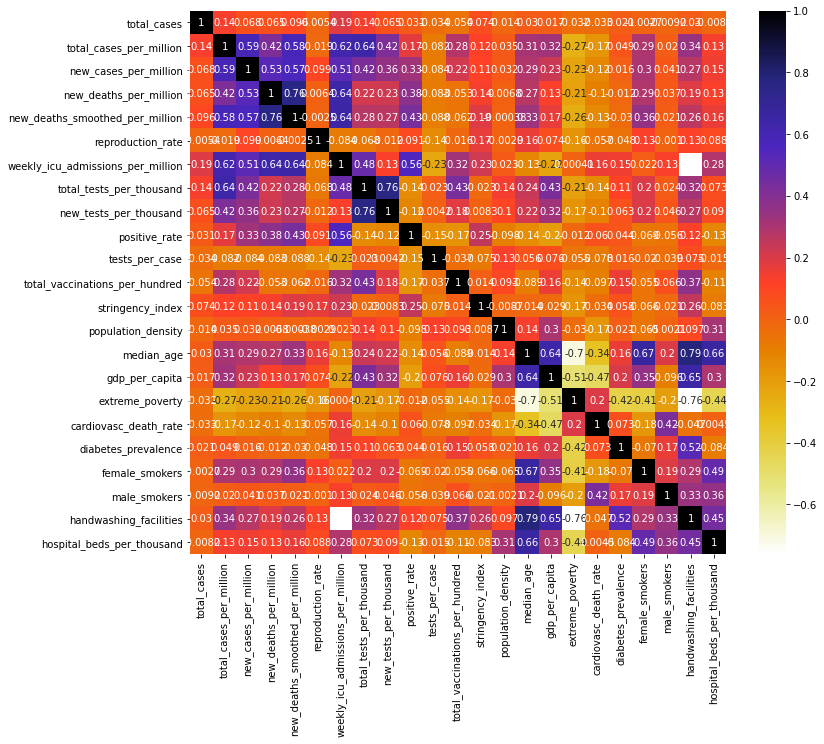

In [ ]:

import seaborn as sns
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
  col_corr = set() # set of all names of correlated coloumns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

  


In [ ]:
corr_features = correlation(x_train,0.8)
len(set(corr_features))

0

In [ ]:
corr_features

set()

In [ ]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
dfm.info()

In [ ]:
dfm.isnull().sum()

In [ ]:
dfm.dropna(subset=['continent'],how='any',inplace=True)

In [ ]:
dfm.info()

In [ ]:
dfm.fillna(value='0',axis=0,inplace=True)

In [ ]:
dfm.isnull().sum()


In [ ]:
dfm

In [ ]:
dfm.drop(dfm.tail(71733).index,inplace=True)
dfm


,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,1,1,0,0,0,0,0.026,0.026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.33,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.511
1,Asia,Afghanistan,2020-02-25,1,0,0,0,0,0,0.026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.33,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.511
2,Asia,Afghanistan,2020-02-26,1,0,0,0,0,0,0.026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.33,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.511
3,Asia,Afghanistan,2020-02-27,1,0,0,0,0,0,0.026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.33,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.511
4,Asia,Afghanistan,2020-02-28,1,0,0,0,0,0,0.026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.33,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,South America,Argentina,2020-02-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,422,0.009,0,2,0,0,0,people tested,0,0,0,0,0,0,0,0,0,11.11,4.51958e+07,16.177,31.9,11.198,7.441,18933.9,0.6,191.032,5.5,16.2,27.7,0,5,76.67,0.845
2707,South America,Argentina,2020-02-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,people tested,0,0,0,0,0,0,0,0,0,11.11,4.51958e+07,16.177,31.9,11.198,7.441,18933.9,0.6,191.032,5.5,16.2,27.7,0,5,76.67,0.845
2708,South America,Argentina,2020-02-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,people tested,0,0,0,0,0,0,0,0,0,11.11,4.51958e+07,16.177,31.9,11.198,7.441,18933.9,0.6,191.032,5.5,16.2,27.7,0,5,76.67,0.845
2709,South America,Argentina,2020-02-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,people tested,0,0,0,0,0,0,0,0,0,11.11,4.51958e+07,16.177,31.9,11.198,7.441,18933.9,0.6,191.032,5.5,16.2,27.7,0,5,76.67,0.845


In [ ]:
dfm.rename(columns = {'new_cases' : 'y','date':'ds'},inplace = True)

In [ ]:
df_new = dfm[['ds','y']]
df_new

,ds,y
0,2020-02-24,1
1,2020-02-25,0
2,2020-02-26,0
3,2020-02-27,0
4,2020-02-28,0
...,...,...
2706,2020-02-13,0
2707,2020-02-14,0
2708,2020-02-15,0
2709,2020-02-16,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711 entries, 0 to 2710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      2711 non-null   object
 1   y       2711 non-null   object
dtypes: object(2)
memory usage: 63.5+ KB


In [ ]:
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711 entries, 0 to 2710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2711 non-null   datetime64[ns]
 1   y       2711 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 63.5 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


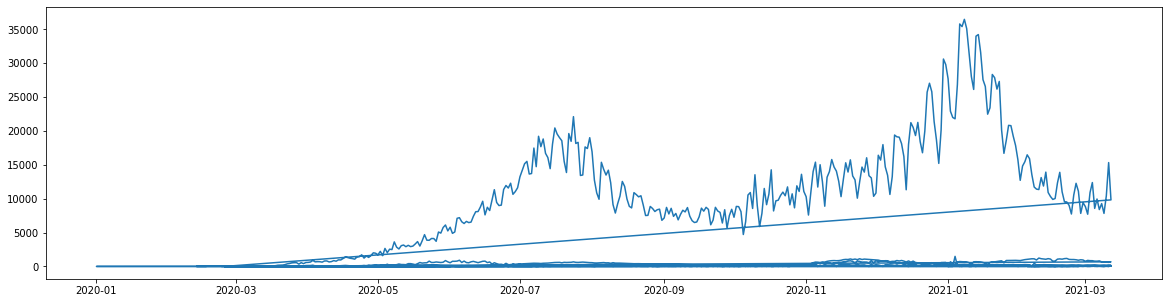

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_new['ds'],df_new['y'])
plt.show()

In [ ]:
import fbprophet

op = fbprophet.Prophet(changepoint_prior_scale=1)
op.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = op.make_future_dataframe(periods = 365 ,freq = 'H')
forecast = op.predict(forecast)

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01 00:00:00,-6.946386,-5777.820048,5908.801782
1,2020-01-02 00:00:00,28.097219,-5755.697983,6139.940213
2,2020-01-03 00:00:00,0.151337,-5857.210399,6006.084047
3,2020-01-04 00:00:00,-79.343537,-5867.029606,5620.056598
4,2020-01-05 00:00:00,-238.509799,-5668.795073,5247.484462
...,...,...,...,...
797,2021-03-27 01:00:00,503.058302,-5014.466853,6531.817837
798,2021-03-27 02:00:00,495.216820,-5303.777913,6451.615937
799,2021-03-27 03:00:00,487.269324,-5376.696364,6217.805443
800,2021-03-27 04:00:00,479.228964,-5114.156864,5871.999906


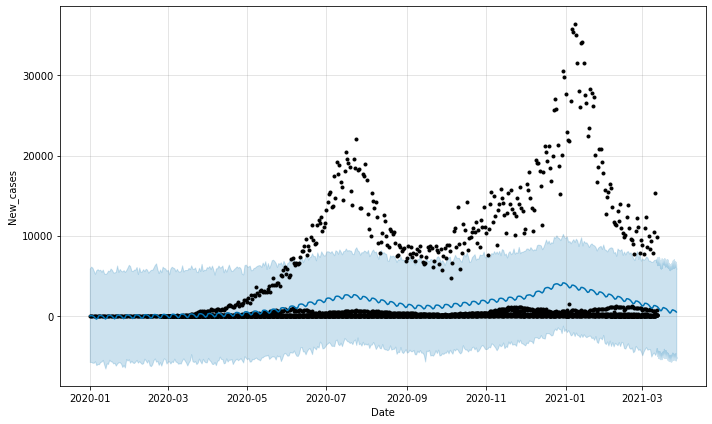

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel='New_cases');